In [12]:
import os
import pandas as pd

In [13]:
best_result = pd.read_csv('./submission/661.csv')
yest_result = pd.read_csv('./submission/result_anomaly_remove_submission_1114.csv')
curr_result = pd.read_csv('./submission/result_anomaly_remove_submission_1115.csv')

In [14]:
best_result

,ID,answer
0,TG_A_J_20230304,3150.096080
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,3054.208630
3,TG_A_J_20230307,3409.854361
4,TG_A_J_20230308,3274.246862
...,...,...
1087,RD_F_J_20230327,518.637768
1088,RD_F_J_20230328,536.193714
1089,RD_F_J_20230329,538.315822
1090,RD_F_J_20230330,521.321832


In [15]:
curr_result

,ID,answer
0,TG_A_J_20230304,3266.457607
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,3264.108216
3,TG_A_J_20230307,3236.527574
4,TG_A_J_20230308,3217.665669
...,...,...
1087,RD_F_J_20230327,582.979526
1088,RD_F_J_20230328,580.387480
1089,RD_F_J_20230329,575.994525
1090,RD_F_J_20230330,568.118361


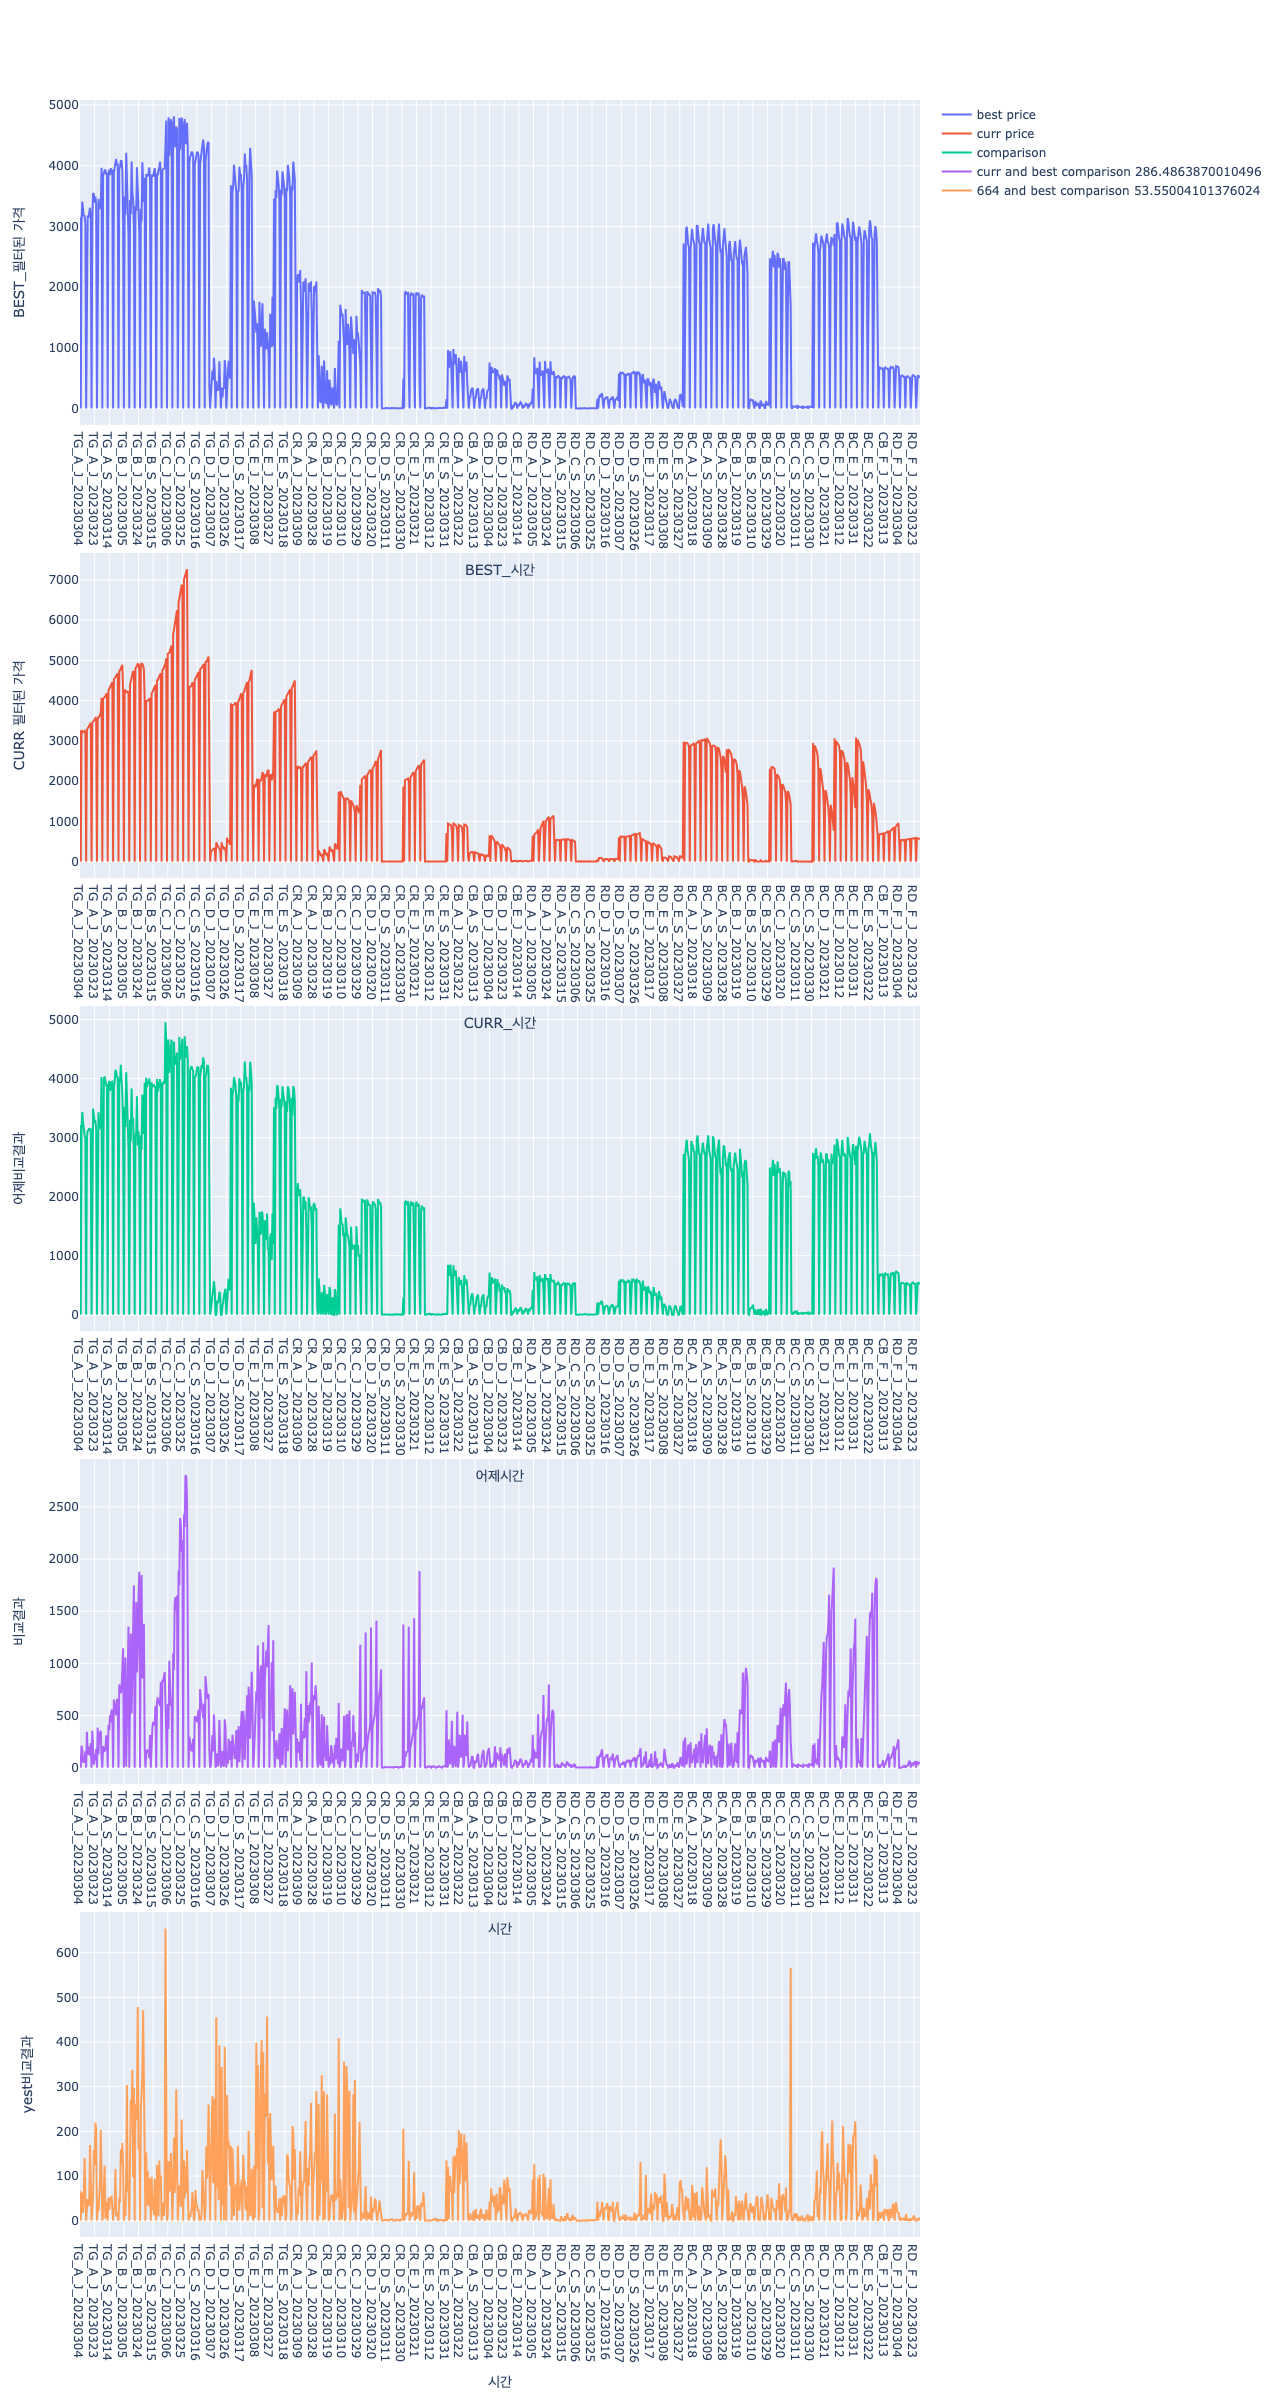

In [16]:
import math
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# 그래프 초기화
fig = make_subplots(rows=5, cols=1)


trace = go.Scatter(x=best_result['ID'],
                   y=best_result['answer'],
                   mode='lines',
                   name=f'best price')

fig.add_trace(trace, row=1, col=1)
fig.update_xaxes(title_text=f'BEST_시간', row=1, col=1)
fig.update_yaxes(title_text=f'BEST_필터된 가격', row=1, col=1)


trace = go.Scatter(x=curr_result['ID'],
                   y=curr_result['answer'],
                   mode='lines',
                   name=f'curr price')

fig.add_trace(trace, row=2, col=1)
fig.update_xaxes(title_text=f'CURR_시간', row=2, col=1)
fig.update_yaxes(title_text=f'CURR 필터된 가격', row=2, col=1)



trace = go.Scatter(x=yest_result['ID'],
                   y=yest_result['answer'],
                   mode='lines',
                   name=f'comparison')

fig.add_trace(trace, row=3, col=1)
fig.update_xaxes(title_text=f'어제시간', row=3, col=1)
fig.update_yaxes(title_text=f'어제비교결과', row=3, col=1)


trace = go.Scatter(x=best_result['ID'],
                   y=abs(best_result['answer'] - curr_result['answer']),
                   mode='lines',
                   name=f"curr and best comparison {np.mean(np.sqrt(np.power(best_result['answer'] - curr_result['answer'], 2)))}")

fig.add_trace(trace, row=4, col=1)
fig.update_xaxes(title_text=f'시간', row=4, col=1)
fig.update_yaxes(title_text=f'비교결과', row=4, col=1)


trace = go.Scatter(x=best_result['ID'],
                   y=abs(best_result['answer'] - yest_result['answer']),
                   mode='lines',
                   name=f"664 and best comparison {np.mean(np.sqrt(np.power(best_result['answer'] - yest_result['answer'], 2)))}")

fig.add_trace(trace, row=5, col=1)
fig.update_xaxes(title_text=f'시간', row=5, col=1)
fig.update_yaxes(title_text=f'yest비교결과', row=5, col=1)


fig.update_layout(width=1200,height=2400)
fig.show()

In [6]:
np.power(best_result['answer'],2) - np.power(yest_result['answer'],2)

0      -426685.789928
1            0.000000
2      -393547.431594
3      -157403.110510
4       118021.101732
            ...      
1087       267.012782
1088     -3920.640090
1089     -2324.274652
1090      3484.139992
1091     -7423.940608
Name: answer, Length: 1092, dtype: float64